GROUP PROJECT: Statistical Analysis and Performance Prediction of the Olympic Winners

BY HERMINE GUIOMARD, OCTAVE MASSOT, MARIE ROLLAND, MELHYANE AMRAOUI, EWEN GUILLERMO AND NATHAN CORBINEAU

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import statsmodels.api as sm
from scipy.stats import norm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
df=pd.read_excel("Country_Medals.xlsx")

In [3]:
df.head()

,Year,Country_Code,Country_Name,Host_city,Host_country,Gold,Silver,Bronze
0,1932,(USA),United States,Los Angeles,United States,41,32,30
1,1932,(ITA),Italy,Los Angeles,United States,12,12,12
2,1932,(FRA),France,Los Angeles,United States,10,5,4
3,1932,(SWE),Sweden,Los Angeles,United States,9,5,9
4,1932,(JPN),Japan,Los Angeles,United States,7,7,4


In [4]:
df.tail()

,Year,Country_Code,Country_Name,Host_city,Host_country,Gold,Silver,Bronze
1339,1936,(MEX),Mexico,Berlin,Germany,0,0,3
1340,1936,(BEL),Belgium,Berlin,Germany,0,0,2
1341,1936,(AUS),Australia,Berlin,Germany,0,0,1
1342,1936,(PHI),Philippines,Berlin,Germany,0,0,1
1343,1936,(POR),Portugal,Berlin,Germany,0,0,1


In [5]:
df.shape

(1344, 8)

In [6]:
dim_rows=df.shape[0]
print("dimension of rows=", dim_rows)

dimension of rows= 1344


In [7]:
df.isna().sum()

Year             0
Country_Code    86
Country_Name     0
Host_city       38
Host_country    38
Gold             0
Silver           0
Bronze           0
dtype: int64

In [8]:
df_new=df.dropna()

In [9]:
df_new.isna().sum()

Year            0
Country_Code    0
Country_Name    0
Host_city       0
Host_country    0
Gold            0
Silver          0
Bronze          0
dtype: int64

In [10]:
dim_rows_new=df_new.shape[0]
print("dimension of rows=", dim_rows_new)

dimension of rows= 1220


In [11]:
kpi_keeping=dim_rows_new/dim_rows
print("we kept", kpi_keeping)

we kept 0.9077380952380952


In [12]:
df=df_new

In [13]:
df.columns

Index(['Year', 'Country_Code', 'Country_Name', 'Host_city', 'Host_country',
       'Gold', 'Silver', 'Bronze'],
      dtype='object')

In [14]:
df.describe()

,Year,Gold,Silver,Bronze
count,1220.000000,1220.000000,1220.000000,1220.000000
mean,1977.062295,4.105738,4.071311,4.407377
std,33.440497,8.566650,7.203977,6.900591
min,1896.000000,0.000000,0.000000,0.000000
25%,1960.000000,0.000000,1.000000,1.000000
50%,1988.000000,1.000000,1.000000,2.000000
75%,2004.000000,4.000000,5.000000,5.000000
max,2020.000000,83.000000,78.000000,77.000000


In [15]:
# Normalization test of the "Gold" variable

In [16]:
data = df["Gold"]
P_value = stats.shapiro(data)
print(P_value)

ShapiroResult(statistic=np.float64(0.49396426705435004), pvalue=np.float64(3.738234373926781e-50))


In [17]:
p_value = P_value.pvalue
alpha = 0.05
if p_value < alpha:
    print("Conclusion: p-value < 0.05 → reject the normality hypothesis.")
    print("The 'Gold' variable does not follow a normal distribution according to the Shapiro test, so the analysis stops here.")
else:
    print("Conclusion: p-value ≥ 0.05 → do not reject the normality hypothesis.")
    print("The 'Gold' variable can be considered to follow a normal distribution, so the analysis can continue.")

Conclusion: p-value < 0.05 → reject the normality hypothesis.
The 'Gold' variable does not follow a normal distribution according to the Shapiro test, so the analysis stops here.


In [18]:
# Hypothesis 1: 
# H0: a country's number of gold medals is not different when it is the host country compared to when it is not.
# H1: host countries win more gold medals than non-host countries.

df["Is_Host_Country"] = (df["Country_Name"] == df["Host_country"]).astype(int)
gold_host = df[df["Is_Host_Country"] == 1]["Gold"]
gold_nonhost = df[df["Is_Host_Country"] == 0]["Gold"]

In [19]:
sh_host = stats.shapiro(gold_host)
sh_non = stats.shapiro(gold_nonhost)
print(sh_host, sh_non)

ShapiroResult(statistic=np.float64(0.8463754994583355), pvalue=np.float64(0.0009772450660842378)) ShapiroResult(statistic=np.float64(0.5175052075663842), pvalue=np.float64(5.619732382576555e-49))


In [20]:
res = stats.mannwhitneyu(gold_host, gold_nonhost, alternative="greater")
print(res)

alpha = 0.05
if res.pvalue < alpha:
    print("Reject H0: host countries win significantly more gold medals.")
else:
    print("Fail to reject H0: no evidence of a significant advantage.")

MannwhitneyuResult(statistic=np.float64(29133.5), pvalue=np.float64(7.750980164415123e-14))
Reject H0: host countries win significantly more gold medals.


In [21]:
# Hypothesis 2: 
# H0: countries that win at least 40 gold medals do not have more total medals than those that win fewer than 40. 
# H1: countries that win at least 40 gold medals have more total medals than those that win fewer than 40.

df["Total"] = df["Gold"] + df["Silver"] + df["Bronze"]
g1 = df[df["Gold"] >= 40]["Total"]   # countries with very strong gold performance
g2 = df[df["Gold"] < 40]["Total"]    # other countries

In [22]:
sh1 = stats.shapiro(g1)
sh2 = stats.shapiro(g2)
print(sh1, sh2)

ShapiroResult(statistic=np.float64(0.8081489496065994), pvalue=np.float64(0.0015045717734365552)) ShapiroResult(statistic=np.float64(0.6123273405536125), pvalue=np.float64(1.1471197806027475e-45))


In [23]:
res = stats.mannwhitneyu(g1, g2, alternative="greater")
print(res)

alpha = 0.05
if res.pvalue < alpha:
    print("Reject H0: countries with at least 40 gold medals win significantly more total medals.")
else:
    print("Fail to reject H0: there is no evidence that having at least 40 gold medals implies more total medals.")

MannwhitneyuResult(statistic=np.float64(22741.0), pvalue=np.float64(3.4821460271641816e-14))
Reject H0: countries with at least 40 gold medals win significantly more total medals.


In [45]:
# Pivot table: sum medals per country
pivot = pd.pivot_table(
    df,
    values=["Gold", "Silver", "Bronze"],
    index="Country_Name",
    aggfunc="sum"
)

# Total medals
pivot["Total"] = pivot["Gold"] + pivot["Silver"] + pivot["Bronze"]

# Select top 10 countries by total medals
top10 = pivot.sort_values("Total", ascending=False).head(10)

# Independent (X) and dependent (Y) variables
X = top10["Gold"]
Y = top10["Total"]

# Linear regression: y = mx + c
m, c = np.polyfit(X, Y, 1)

# Regression line
Y_pred = m * X + c

In [46]:
# Example: predict total medals for a country with 40 gold medals
gold_medals = 40

predicted_total = m * gold_medals + c
print("Predicted total medals:", round(predicted_total))

Predicted total medals: 229


In [47]:
# Pour chaque année, trouver le max d'or
max_gold_per_year = df.groupby("Year")["Gold"].transform("max")

# Cible binaire : 1 si le pays gagne les JO cette année, 0 sinon
df["Win_JO"] = (df["Gold"] == max_gold_per_year).astype(int)

In [48]:
X = df[["Gold", "Silver", "Bronze", "Is_Host_Country", "Year"]]  # ou au minimum ["Gold"]
y = df["Win_JO"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = RandomForestClassifier(random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       358
           1       0.88      0.88      0.88         8

    accuracy                           0.99       366
   macro avg       0.94      0.94      0.94       366
weighted avg       0.99      0.99      0.99       366



In [49]:
winners = df[df["Win_JO"] == 1]

print("Average number of gold medals for winners:", winners["Gold"].mean())
print("Median number of gold medals for winners:", winners["Gold"].median())
print("10th percentile:", winners["Gold"].quantile(0.10))
print("90th percentile:", winners["Gold"].quantile(0.90))

Average number of gold medals for winners: 44.148148148148145
Median number of gold medals for winners: 43.0
10th percentile: 26.6
90th percentile: 64.00000000000004


In [50]:
mean_gold = winners["Gold"].mean()
median_gold = winners["Gold"].median()
p10_gold = winners["Gold"].quantile(0.10)
p90_gold = winners["Gold"].quantile(0.90)

print("Conclusions:")
print(f"- On average, countries that win the Olympics earn around {mean_gold:.0f} gold medals.")
print(f"- Half of the winning countries have at least {median_gold:.0f} gold medals.")
print(f"- Around 90% of winners have at least {p10_gold:.0f} gold medals;")
print("  only 10% win the Games with fewer than this threshold.")
print(f"- The most dominant countries can reach up to about {p90_gold:.0f} gold medals.")
print(f"=> Historically, aiming for at least around thirty gold medals (~{p10_gold:.0f})")
print("   seems necessary to have a realistic chance of winning the Olympics.")

Conclusions:
- On average, countries that win the Olympics earn around 44 gold medals.
- Half of the winning countries have at least 43 gold medals.
- Around 90% of winners have at least 27 gold medals;
  only 10% win the Games with fewer than this threshold.
- The most dominant countries can reach up to about 64 gold medals.
=> Historically, aiming for at least around thirty gold medals (~27)
   seems necessary to have a realistic chance of winning the Olympics.


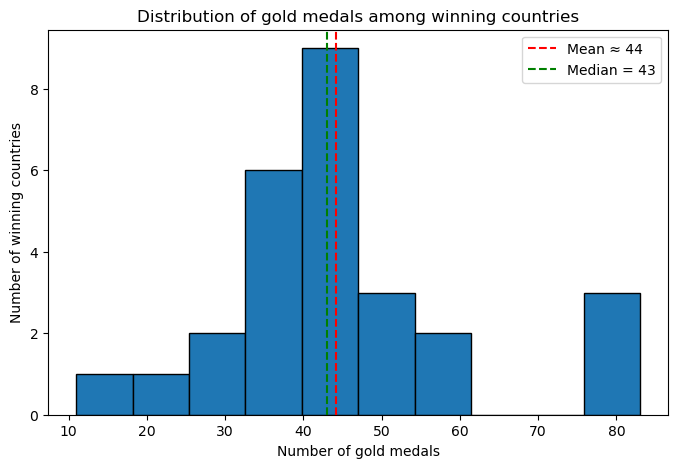

In [51]:
#Histogram of gold medals for winners

plt.figure(figsize=(8, 5))
plt.hist(winners["Gold"], bins=10, edgecolor="black")
plt.axvline(winners["Gold"].mean(), color="red", linestyle="--", label=f"Mean ≈ {mean_gold:.0f}")
plt.axvline(winners["Gold"].median(), color="green", linestyle="--", label=f"Median = {median_gold:.0f}")
plt.xlabel("Number of gold medals")
plt.ylabel("Number of winning countries")
plt.title("Distribution of gold medals among winning countries")
plt.legend()
plt.show()

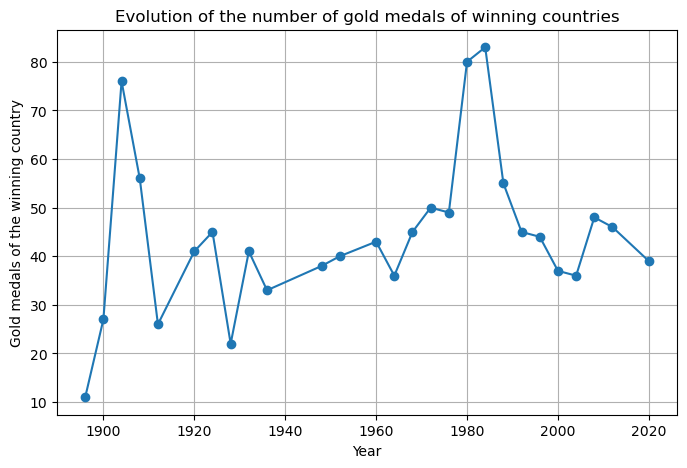

In [52]:
#Evolution of gold medals for winners
winners_year = winners.sort_values("Year")

plt.figure(figsize=(8, 5))
plt.plot(winners_year["Year"], winners_year["Gold"], marker="o")
plt.xlabel("Year")
plt.ylabel("Gold medals of the winning country")
plt.title("Evolution of the number of gold medals of winning countries")
plt.grid(True)
plt.show()

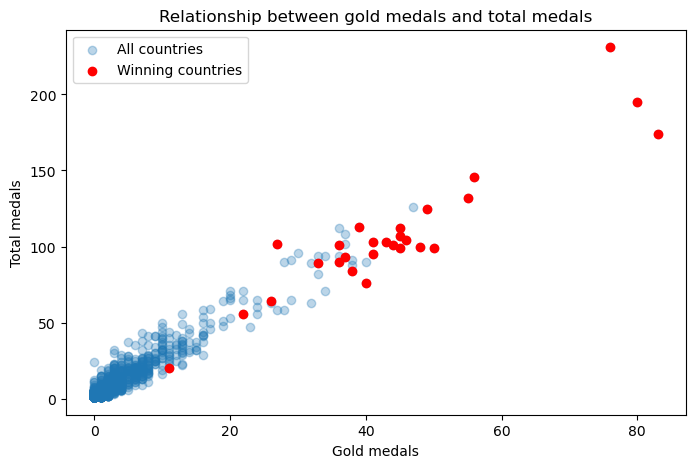

In [53]:
plt.figure(figsize=(8, 5))
plt.scatter(df["Gold"], df["Total"], alpha=0.3, label="All countries")
plt.scatter(winners["Gold"], winners["Total"], color="red", label="Winning countries")
plt.xlabel("Gold medals")
plt.ylabel("Total medals")
plt.title("Relationship between gold medals and total medals")
plt.legend()
plt.show()

In [54]:
# Final Project Summary

print("=== STATISTICAL SUMMARY ===")
print("- The gold medal count is not normally distributed (Shapiro test).")
print("- On average, countries that win the Olympics earn ≈ 44 gold medals.")
print("- The median gold medal count among winners is ≈ 43 medals.")
print("- About 90% of winning countries have at least ~27 gold medals.")

print("\n=== HYPOTHESIS RESULTS ===")
print("Hypothesis 1: Host country effect on gold medals")
print("→ Mann–Whitney test: host countries win significantly more gold medals.")

print("\nHypothesis 2: Countries with ≥ 40 golds vs others (total medals)")
print("→ Mann–Whitney test: countries with ≥ 40 golds earn significantly more total medals.")

print("\n=== MODELING / PREDICTION ===")
print("- The classification model (Random Forest) predicts the winning country very accurately (accuracy ≈ 0.99).")
print("- A country with ~40 gold medals is predicted to have around 230 total medals (order of magnitude).")

print("\n=== INTERPRETIVE CONCLUSION ===")
print("- Hosting the Olympics is associated with a significant advantage in the number of gold medals won.")
print("- Historically, aiming for at least around 30 gold medals seems necessary")
print("  to have a realistic chance of winning the Games.")
print("- Highly dominant countries can reach up to ~60–65 gold medals among the winners.")

=== STATISTICAL SUMMARY ===
- The gold medal count is not normally distributed (Shapiro test).
- On average, countries that win the Olympics earn ≈ 44 gold medals.
- The median gold medal count among winners is ≈ 43 medals.
- About 90% of winning countries have at least ~27 gold medals.

=== HYPOTHESIS RESULTS ===
Hypothesis 1: Host country effect on gold medals
→ Mann–Whitney test: host countries win significantly more gold medals.

Hypothesis 2: Countries with ≥ 40 golds vs others (total medals)
→ Mann–Whitney test: countries with ≥ 40 golds earn significantly more total medals.

=== MODELING / PREDICTION ===
- The classification model (Random Forest) predicts the winning country very accurately (accuracy ≈ 0.99).
- A country with ~40 gold medals is predicted to have around 230 total medals (order of magnitude).

=== INTERPRETIVE CONCLUSION ===
- Hosting the Olympics is associated with a significant advantage in the number of gold medals won.
- Historically, aiming for at least aroun